# Project – Predictive Analysis using scikit-learn

“Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

## Load the data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# set options
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [3]:
# read csv into df
mushrooms = pd.read_csv('mushrooms.csv')

In [4]:
# view df head
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
# rename class column
mushrooms = mushrooms.rename(columns={'class':'poisonous'})

In [6]:
# look for null values
mushrooms.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Identify a subset

In [7]:
# select a subset of variables
subset = mushrooms[['poisonous', 'odor', 'cap-shape', 'cap-surface', 'cap-color', 'gill-color']]
subset

,poisonous,odor,cap-shape,cap-surface,cap-color,gill-color
0,p,p,x,s,n,k
1,e,a,x,s,y,k
2,e,l,b,s,w,n
3,p,p,x,y,w,n
4,e,n,x,s,g,k
...,...,...,...,...,...,...
8119,e,n,k,s,n,y
8120,e,n,x,s,n,y
8121,e,n,f,s,n,n
8122,p,y,k,y,n,b


In [8]:
# replace the variable codes with meaningful values
subset['poisonous'] = subset['poisonous'].replace(['e','p'],['edible','poisonous'])
subset['cap-shape'] = subset['cap-shape'].replace(['b','c', 'x', 'f', 'k', 's'],['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'])
subset['cap-surface'] = subset['cap-surface'].replace(['f','g', 'y', 's'],['fibrous', 'grooves', 'scaly', 'smooth'])
subset['cap-color'] = subset['cap-color'].replace(['n','b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'])
subset['odor'] = subset['odor'].replace(['a','l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],['almond', 'anise', 'creosote', 'fishy','foul', 'musty','none','pungent','spicy'])
subset['gill-color'] = subset['gill-color'].replace(['k','n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange',
                                                                                                                 'pink', 'purple', 'red', 'white', 'yellow'])
subset

,poisonous,odor,cap-shape,cap-surface,cap-color,gill-color
0,poisonous,pungent,convex,smooth,brown,black
1,edible,almond,convex,smooth,yellow,black
2,edible,anise,bell,smooth,white,brown
3,poisonous,pungent,convex,scaly,white,brown
4,edible,none,convex,smooth,gray,black
...,...,...,...,...,...,...
8119,edible,none,knobbed,smooth,brown,yellow
8120,edible,none,convex,smooth,brown,yellow
8121,edible,none,flat,smooth,brown,brown
8122,poisonous,fishy,knobbed,scaly,brown,buff


## Exploratory analysis

More than half of the mushrooms in this dataset are edible.

In [9]:
subset.poisonous.value_counts()

edible       4208
poisonous    3916
Name: poisonous, dtype: int64

### Odor

A significant percentage of mushrooms in this dataset have no odor, and those odorless mushrooms are recorded as poisonous and edible.

In [10]:
subset.odor.value_counts()

none        3528
foul        2160
spicy        576
fishy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

In [11]:
subset.groupby('odor')['poisonous'].value_counts()

odor      poisonous
almond    edible        400
anise     edible        400
creosote  poisonous     192
fishy     poisonous     576
foul      poisonous    2160
musty     poisonous      36
none      edible       3408
          poisonous     120
pungent   poisonous     256
spicy     poisonous     576
Name: poisonous, dtype: int64

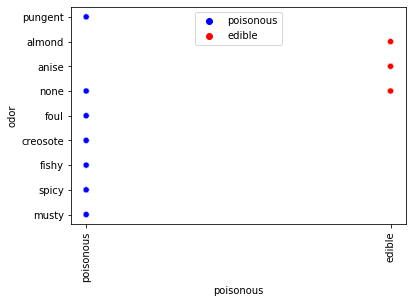

In [12]:
sns.scatterplot(
    x='poisonous',
    y='odor',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

### Cap shape

Bell-, convex-, flat-, and knobbed-capped mushroms can be either edible or poisonous.

In [13]:
subset['cap-shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

In [14]:
subset.groupby('cap-shape')['poisonous'].value_counts()

cap-shape  poisonous
bell       edible        404
           poisonous      48
conical    poisonous       4
convex     edible       1948
           poisonous    1708
flat       edible       1596
           poisonous    1556
knobbed    poisonous     600
           edible        228
sunken     edible         32
Name: poisonous, dtype: int64

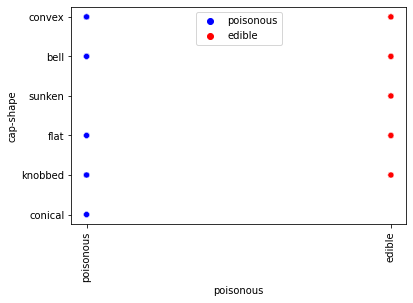

In [15]:
sns.scatterplot(
    x='poisonous',
    y='cap-shape',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

### Cap surface

In this dataset, only groove-surface caps are exclusively poisonous. 

In [16]:
subset['cap-surface'].value_counts()

scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64

In [17]:
subset.groupby('cap-surface')['poisonous'].value_counts()

cap-surface  poisonous
fibrous      edible       1560
             poisonous     760
grooves      poisonous       4
scaly        poisonous    1740
             edible       1504
smooth       poisonous    1412
             edible       1144
Name: poisonous, dtype: int64

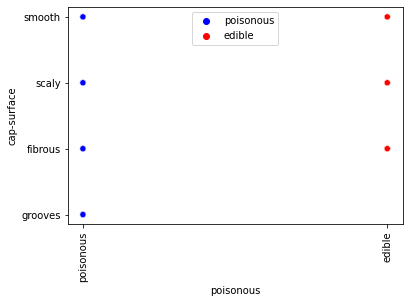

In [18]:
sns.scatterplot(
    x='poisonous',
    y='cap-surface',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

### Cap color

In this dataset, only green and purple caps are exclusive to edible mushrooms.

In [19]:
subset['cap-color'].value_counts()

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64

In [20]:
subset.groupby('cap-color')['poisonous'].value_counts()

cap-color  poisonous
brown      edible       1264
           poisonous    1020
buff       poisonous     120
           edible         48
cinnamon   edible         32
           poisonous      12
gray       edible       1032
           poisonous     808
green      edible         16
pink       poisonous      88
           edible         56
purple     edible         16
red        poisonous     876
           edible        624
white      edible        720
           poisonous     320
yellow     poisonous     672
           edible        400
Name: poisonous, dtype: int64

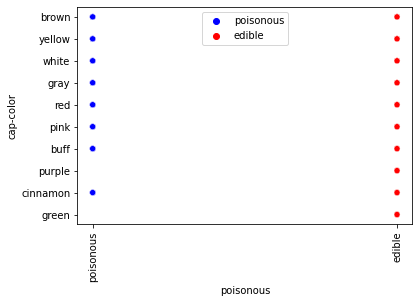

In [21]:
sns.scatterplot(
    x='poisonous',
    y='cap-color',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

### Gill color

In this dataset, buff-colored gills indicate poisonous, whereas red-colored gills indicate edible.

In [22]:
subset['gill-color'].value_counts()

buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill-color, dtype: int64

In [23]:
subset.groupby('gill-color')['poisonous'].value_counts()

gill-color  poisonous
black       edible        344
            poisonous      64
brown       edible        936
            poisonous     112
buff        poisonous    1728
chocolate   poisonous     528
            edible        204
gray        poisonous     504
            edible        248
green       poisonous      24
orange      edible         64
pink        edible        852
            poisonous     640
purple      edible        444
            poisonous      48
red         edible         96
white       edible        956
            poisonous     246
yellow      edible         64
            poisonous      22
Name: poisonous, dtype: int64

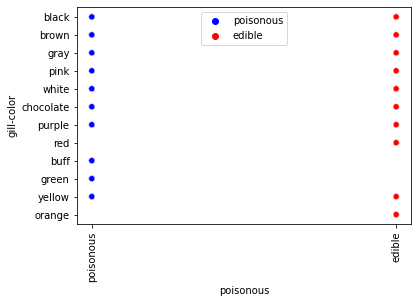

In [24]:
sns.scatterplot(
    x='poisonous',
    y='gill-color',
    hue = 'poisonous',
    palette=['blue','red'],
    data=subset)
plt.xticks(rotation=90)
plt.legend(loc='upper center');

## Split the data into training and testing sets

In [25]:
# replace values with dummy values (1 indicates presence of, 0 indicates absence of)
dummies = pd.get_dummies(data=subset, columns=['poisonous', 'odor', 'cap-shape', 'cap-surface', 'cap-color', 'gill-color'])

In [26]:
# there are columns for each attribute
dummies.columns

Index(['poisonous_edible', 'poisonous_poisonous', 'odor_almond', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'cap-shape_bell', 'cap-shape_conical',
       'cap-shape_convex', 'cap-shape_flat', 'cap-shape_knobbed',
       'cap-shape_sunken', 'cap-surface_fibrous', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_brown',
       'cap-color_buff', 'cap-color_cinnamon', 'cap-color_gray',
       'cap-color_green', 'cap-color_pink', 'cap-color_purple',
       'cap-color_red', 'cap-color_white', 'cap-color_yellow',
       'gill-color_black', 'gill-color_brown', 'gill-color_buff',
       'gill-color_chocolate', 'gill-color_gray', 'gill-color_green',
       'gill-color_orange', 'gill-color_pink', 'gill-color_purple',
       'gill-color_red', 'gill-color_white', 'gill-color_yellow'],
      dtype='object')

In [27]:
# isolate dependent variable
poisonous = dummies[['poisonous_poisonous']]

## Create and evaluate models

### Odor

In [28]:
# consider odor alone as a model
odor = dummies[['odor_almond', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(odor, poisonous, test_size=0.2, random_state=1)

In [30]:
odor_model = LinearRegression()
odor_model.fit(X_train, y_train)

LinearRegression()

In [31]:
odor_model.score(X_train, y_train)

0.9474202980251896

In [32]:
odor_model.score(X_test, y_test)

0.9244863586022131

About 92% of the time, the odor-only model predicted edibility in the test set.

### Cap shape

In [33]:
cap_shape = dummies[['cap-shape_bell', 'cap-shape_conical',
       'cap-shape_convex', 'cap-shape_flat', 'cap-shape_knobbed',
       'cap-shape_sunken']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cap_shape, poisonous, test_size=0.2, random_state=1)
capShape_model = LinearRegression()
capShape_model.fit(X_train, y_train)

LinearRegression()

In [35]:
capShape_model.score(X_train, y_train)

0.059140151367442995

In [36]:
capShape_model.score(X_test, y_test)

0.06311472864597778

About 6% of the time, the cap-shape-only model predicted edibility in the test set.

### Cap surface

In [37]:
cap_surface = dummies[['cap-surface_fibrous', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(cap_surface, poisonous, test_size=0.2, random_state=1)
capSurface_model = LinearRegression()
capSurface_model.fit(X_train, y_train)

LinearRegression()

In [39]:
capSurface_model.score(X_train, y_train)

0.04074117419650891

In [40]:
capSurface_model.score(X_test, y_test)

0.02937581358877306

Only about 3% of the time, the cap-surface-only model predicted edibility in the test set.

### Cap color

In [41]:
cap_color = dummies[['cap-color_brown',
       'cap-color_buff', 'cap-color_cinnamon', 'cap-color_gray',
       'cap-color_green', 'cap-color_pink', 'cap-color_purple',
       'cap-color_red', 'cap-color_white', 'cap-color_yellow']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cap_color, poisonous, test_size=0.2, random_state=1)
capColor_model = LinearRegression()
capColor_model.fit(X_train, y_train)

LinearRegression()

In [43]:
capColor_model.score(X_train, y_train)

0.05109801790958701

In [44]:
capColor_model.score(X_test, y_test)

0.03212969614425054

Only about 3% of the time, the cap-color-only model predicted edibility in the test set.

### Gill color

In [45]:
gill_color = dummies[['gill-color_black', 'gill-color_brown', 'gill-color_buff',
       'gill-color_chocolate', 'gill-color_gray', 'gill-color_green',
       'gill-color_orange', 'gill-color_pink', 'gill-color_purple',
       'gill-color_red', 'gill-color_white', 'gill-color_yellow']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(gill_color, poisonous, test_size=0.2, random_state=1)
gillColor_model = LinearRegression()
gillColor_model.fit(X_train, y_train)

LinearRegression()

In [47]:
gillColor_model.score(X_train, y_train)

0.46428284135813636

In [48]:
gillColor_model.score(X_test, y_test)

0.4598347364777128

About 46% of the time, the gill-color-only model predicted edibility in the test set. After odor, gill-color is the next most reliable means of determining mushroom edibility.

### All features

In [49]:
all_features = dummies[['odor_almond', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'cap-shape_bell', 'cap-shape_conical',
       'cap-shape_convex', 'cap-shape_flat', 'cap-shape_knobbed',
       'cap-shape_sunken', 'cap-surface_fibrous', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_brown',
       'cap-color_buff', 'cap-color_cinnamon', 'cap-color_gray',
       'cap-color_green', 'cap-color_pink', 'cap-color_purple',
       'cap-color_red', 'cap-color_white', 'cap-color_yellow',
       'gill-color_black', 'gill-color_brown', 'gill-color_buff',
       'gill-color_chocolate', 'gill-color_gray', 'gill-color_green',
       'gill-color_orange', 'gill-color_pink', 'gill-color_purple',
       'gill-color_red', 'gill-color_white', 'gill-color_yellow']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(all_features, poisonous, test_size=0.2, random_state=1)
allFeatures_model = LinearRegression()
allFeatures_model.fit(X_train, y_train)

LinearRegression()

In [51]:
allFeatures_model.score(X_train, y_train)

0.9657134948886302

In [52]:
allFeatures_model.score(X_test, y_test)

0.9456076996366104

When using a model that includes numerical values to represent the presence or absence of all features in the selected subset, about 95% of the time, the model predicts edibility correctly.